Carga de datos

In [31]:
import pandas as pd
import numpy as np

# Carga de datasets
totales = pd.read_csv('Internet Accesos BAF Totales.csv')
prov = pd.read_csv('Internet BAF Provincias.csv')

print(totales.head())
prov.head()


    Año  Trimestre Banda Ancha Fija  Dial Up       Total
0  2025          1       12.079.765   11.852  12.091.617
1  2024          4       11.913.680   11.940  11.925.620
2  2024          3       11.685.135   11.827  11.696.962
3  2024          2       11.544.314   11.793  11.556.107
4  2024          1       11.621.363   11.793  11.633.156


,Año,Trimestre,Provincia,Banda Ancha Fija,Dial Up,Total
0,2025,1,Buenos Aires,5.285.374,5.522,5.290.896
1,2025,1,CABA,1.476.158,2.778,1.478.936
2,2025,1,Catamarca,79.017,0.000,79.017
3,2025,1,Chaco,167.656,5.000,167.661
4,2025,1,Chubut,183.958,763.000,184.721


Vista general y tipos de datos

In [32]:
totales.info()
prov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               45 non-null     int64  
 1   Trimestre         45 non-null     int64  
 2   Banda Ancha Fija  45 non-null     object 
 3   Dial Up           45 non-null     float64
 4   Total             45 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               1103 non-null   int64  
 1   Trimestre         1103 non-null   int64  
 2   Provincia         1103 non-null   object 
 3   Banda Ancha Fija  1103 non-null   object 
 4   Dial Up           1103 non-null   float64
 5   Total             1103 non-null   object 
dtypes: float64(1), int64

Limpieza / modelado inicial

In [33]:
def convertir_columna_numerica(df, cols):
    for c in cols:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace('.', '', regex=False)   # borramos separador de miles
            .str.replace(',', '.', regex=False)  # por si hubiera coma decimal
        )
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

totales = convertir_columna_numerica(totales, ['Banda Ancha Fija', 'Dial Up', 'Total'])
prov = convertir_columna_numerica(prov, ['Banda Ancha Fija', 'Dial Up', 'Total'])


In [34]:
totales.info()
prov.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Año               45 non-null     int64
 1   Trimestre         45 non-null     int64
 2   Banda Ancha Fija  45 non-null     int64
 3   Dial Up           45 non-null     int64
 4   Total             45 non-null     int64
dtypes: int64(5)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               1103 non-null   int64 
 1   Trimestre         1103 non-null   int64 
 2   Provincia         1103 non-null   object
 3   Banda Ancha Fija  1103 non-null   int64 
 4   Dial Up           1103 non-null   int64 
 5   Total             1103 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 51.8+ KB


Valores faltantes, duplicados y outliers

In [35]:
print(totales.isna().sum())
prov.isna().sum()


Año                 0
Trimestre           0
Banda Ancha Fija    0
Dial Up             0
Total               0
dtype: int64


Año                 0
Trimestre           0
Provincia           0
Banda Ancha Fija    0
Dial Up             0
Total               0
dtype: int64

In [36]:
print(totales.duplicated().sum())
prov.duplicated().sum()


0


np.int64(23)

In [37]:
# Si hay:
prov[prov.duplicated(keep=False)].sort_values(['Año', 'Trimestre', 'Provincia']).head()


,Año,Trimestre,Provincia,Banda Ancha Fija,Dial Up,Total
288,2022,1,Buenos Aires,4549131,6293,4555424
289,2022,1,Buenos Aires,4549131,6293,4555424
291,2022,1,Catamarca,62377,10,62378
292,2022,1,Catamarca,62377,10,62378
293,2022,1,Chaco,144114,50,144119


In [38]:
# Se eliminan registros duplicados que repiten exactamente la misma combinacion de valores:
prov    = prov.drop_duplicates()
prov.duplicated().sum()


np.int64(0)

In [39]:
print(prov.describe())

# Por ejemplo, accesos de BAF por provincia
prov['Banda Ancha Fija'].describe()


               Año    Trimestre  Banda Ancha Fija       Dial Up         Total
count  1080.000000  1080.000000      1.080000e+03   1080.000000  1.080000e+03
mean   2019.133333     2.466667      3.750414e+05   2132.585185  3.759101e+05
std       3.251121     1.127958      8.085311e+05   2852.569498  8.101841e+05
min    2014.000000     1.000000      1.219300e+04      0.000000  1.255700e+04
25%    2016.000000     1.000000      6.269100e+04     50.000000  6.384200e+04
50%    2019.000000     2.000000      1.159955e+05    900.000000  1.165245e+05
75%    2022.000000     3.000000      1.995852e+05   3120.000000  2.001335e+05
max    2025.000000     4.000000      5.285374e+06  15229.000000  5.290896e+06


count    1.080000e+03
mean     3.750414e+05
std      8.085311e+05
min      1.219300e+04
25%      6.269100e+04
50%      1.159955e+05
75%      1.995852e+05
max      5.285374e+06
Name: Banda Ancha Fija, dtype: float64

In [40]:
q1 = prov['Banda Ancha Fija'].quantile(0.25)
q3 = prov['Banda Ancha Fija'].quantile(0.75)
iqr = q3 - q1

limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

outliers = prov[
    (prov['Banda Ancha Fija'] < limite_inf) | 
    (prov['Banda Ancha Fija'] > limite_sup)
]
outliers.head()


,Año,Trimestre,Provincia,Banda Ancha Fija,Dial Up,Total
0,2025,1,Buenos Aires,5285374,5522,5290896
1,2025,1,CABA,1476158,2778,1478936
5,2025,1,Córdoba,1125143,590,1125202
20,2025,1,Santa Fe,918809,1390,918948
24,2024,4,Buenos Aires,5215620,5561,5221181


Feature engineering simple

In [44]:
totales['Periodo'] = (
    totales['Año'].astype(str) + '-T' + totales['Trimestre'].astype(str)
)

prov['Periodo'] = (
    prov['Año'].astype(str) + '-T' + prov['Trimestre'].astype(str)
)
print(totales.head())
prov.head()


    Año  Trimestre  Banda Ancha Fija  Dial Up     Total  Periodo
0  2025          1          12079765    11852  12091617  2025-T1
1  2024          4          11913680     1194  11925620  2024-T4
2  2024          3          11685135    11827  11696962  2024-T3
3  2024          2          11544314    11793  11556107  2024-T2
4  2024          1          11621363    11793  11633156  2024-T1


,Año,Trimestre,Provincia,Banda Ancha Fija,Dial Up,Total,Periodo
0,2025,1,Buenos Aires,5285374,5522,5290896,2025-T1
1,2025,1,CABA,1476158,2778,1478936,2025-T1
2,2025,1,Catamarca,79017,0,79017,2025-T1
3,2025,1,Chaco,167656,50,167661,2025-T1
4,2025,1,Chubut,183958,7630,184721,2025-T1


In [ ]:
# Total nacional por año-trimestre desde prov
nacional = prov.groupby(['Año', 'Trimestre'], as_index=False)['Banda Ancha Fija'].sum()
nacional = nacional.rename(columns={'Banda Ancha Fija': 'BAF_Total_Nacional'})

prov = prov.merge(nacional, on=['Año', 'Trimestre'], how='left')
prov['Participacion_BAF_%'] = prov['Banda Ancha Fija'] / prov['BAF_Total_Nacional'] * 100

print(prov.head())

    Año  Trimestre     Provincia  Banda Ancha Fija  Dial Up    Total  Periodo  \
0  2025          1  Buenos Aires           5285374     5522  5290896  2025-T1   
1  2025          1          CABA           1476158     2778  1478936  2025-T1   
2  2025          1     Catamarca             79017        0    79017  2025-T1   
3  2025          1         Chaco            167656       50   167661  2025-T1   
4  2025          1        Chubut            183958     7630   184721  2025-T1   

   BAF_Total_Nacional_x  Participacion_BAF_%  BAF_Total_Nacional_y  \
0              12079765            43.753947              12079765   
1              12079765            12.220089              12079765   
2              12079765             0.654127              12079765   
3              12079765             1.387908              12079765   
4              12079765             1.522861              12079765   

   BAF_Total_Nacional  
0            12079765  
1            12079765  
2            1207976

Gráficos + conclusiones

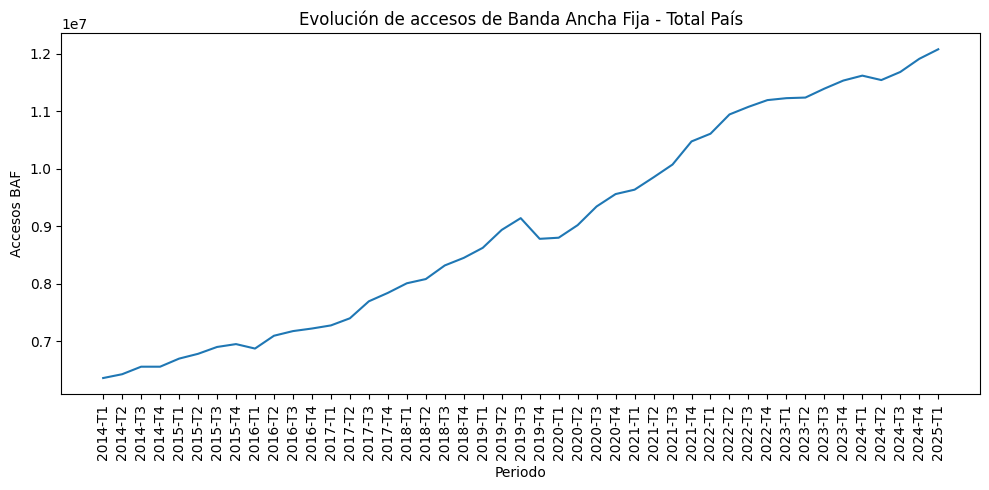

In [54]:
import matplotlib.pyplot as plt

totales_orden = totales.sort_values(['Año', 'Trimestre'])

plt.figure(figsize=(10,5))
plt.plot(
    totales_orden['Periodo'],
    totales_orden['Banda Ancha Fija']
)
plt.xticks(rotation=90)
plt.title('Evolución de accesos de Banda Ancha Fija - Total País')
plt.xlabel('Periodo')
plt.ylabel('Accesos BAF')
plt.tight_layout()
plt.show()


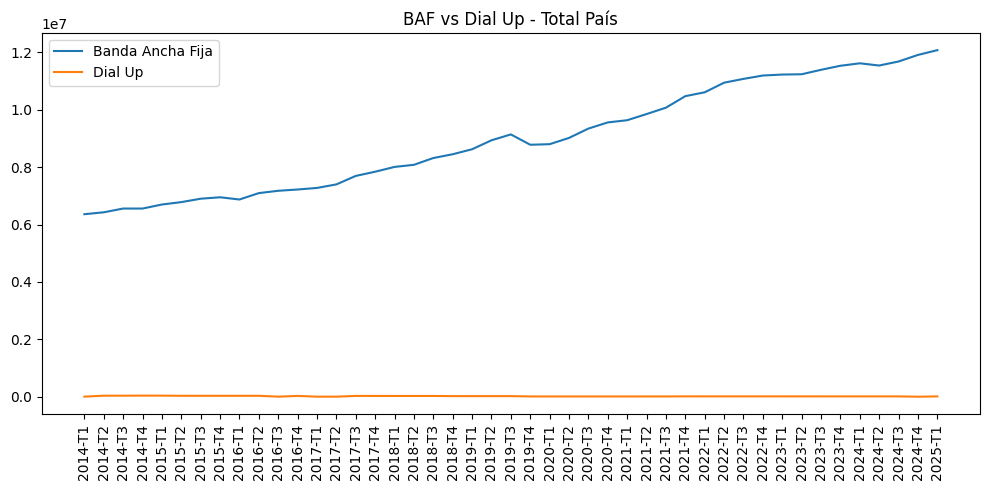

In [56]:
plt.figure(figsize=(10,5))
plt.plot(totales_orden['Periodo'], totales_orden['Banda Ancha Fija'], label='Banda Ancha Fija')
plt.plot(totales_orden['Periodo'], totales_orden['Dial Up'], label='Dial Up')
plt.xticks(rotation=90)
plt.legend()
plt.title('BAF vs Dial Up - Total País')
plt.tight_layout()
plt.show()


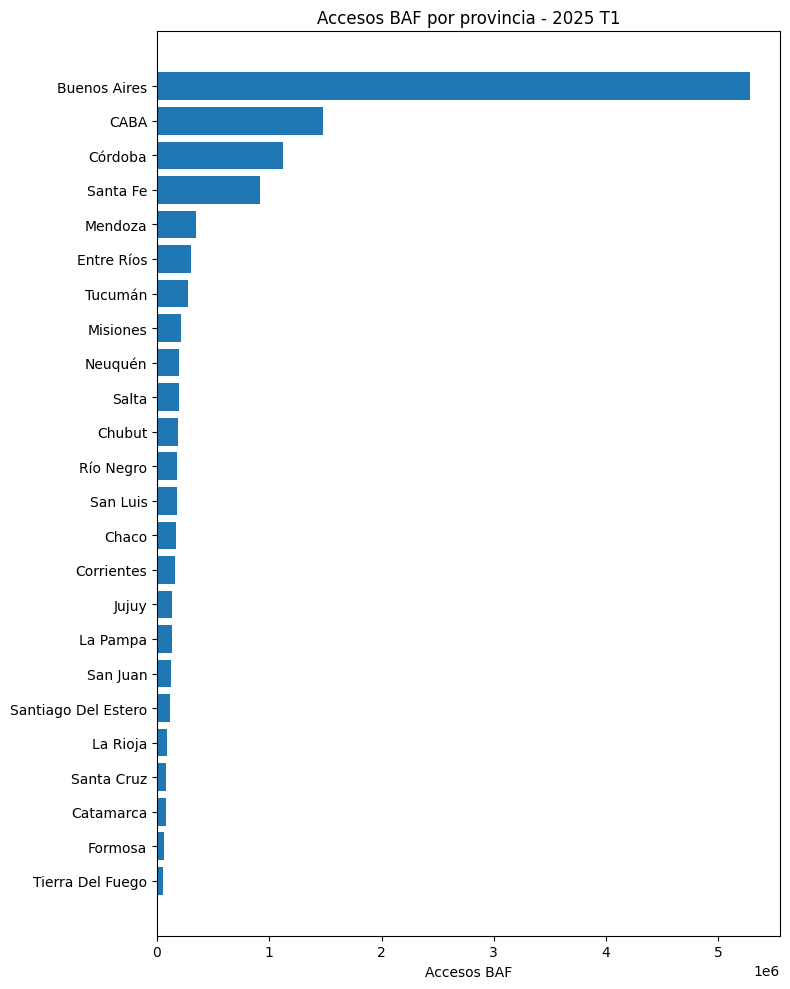

In [57]:
ultimo = prov[(prov['Año'] == 2025) & (prov['Trimestre'] == 1)]
ranking = ultimo.sort_values('Banda Ancha Fija', ascending=False)

plt.figure(figsize=(8,10))
plt.barh(ranking['Provincia'], ranking['Banda Ancha Fija'])
plt.gca().invert_yaxis()
plt.title('Accesos BAF por provincia - 2025 T1')
plt.xlabel('Accesos BAF')
plt.tight_layout()
plt.show()
